In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from algorithms.rl import RL
from examples.test_env import TestEnv
import gym
      
from bettermdptools.algorithms.planner import Planner
from examples.plots import Plots
from gym.envs.toy_text.frozen_lake import generate_random_map

In [2]:
map = ['SFFHFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FHFFFFFFFFFFFFFF',
 'FFFFFFFFFFHFHFFF',
 'FFFFFFFFFFFFHFFH',
 'FFHFFFFFHFFFFFFF',
 'FFFFFFFFFFFFHFFF',
 'FFFFFFFFFFFFFFFF',
 'FFHFFFFFFFFFFFFH',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFH',
 'FFFFFFFFFFFFFFFF',
 'FFHFFFFFHHFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFFFFFF',
 'FFFFFFFFFFFHFFHG']

In [3]:
IS_SLIPPERY = True
SIZE = 16
NROW = SIZE
NCOL = SIZE


frozen_lake = gym.make('FrozenLake-v1', desc=map,is_slippery=IS_SLIPPERY,render_mode="rgb_array")

runtime = 7.55 seconds


runtime = 8.05 seconds


runtime = 9.43 seconds


runtime = 10.98 seconds


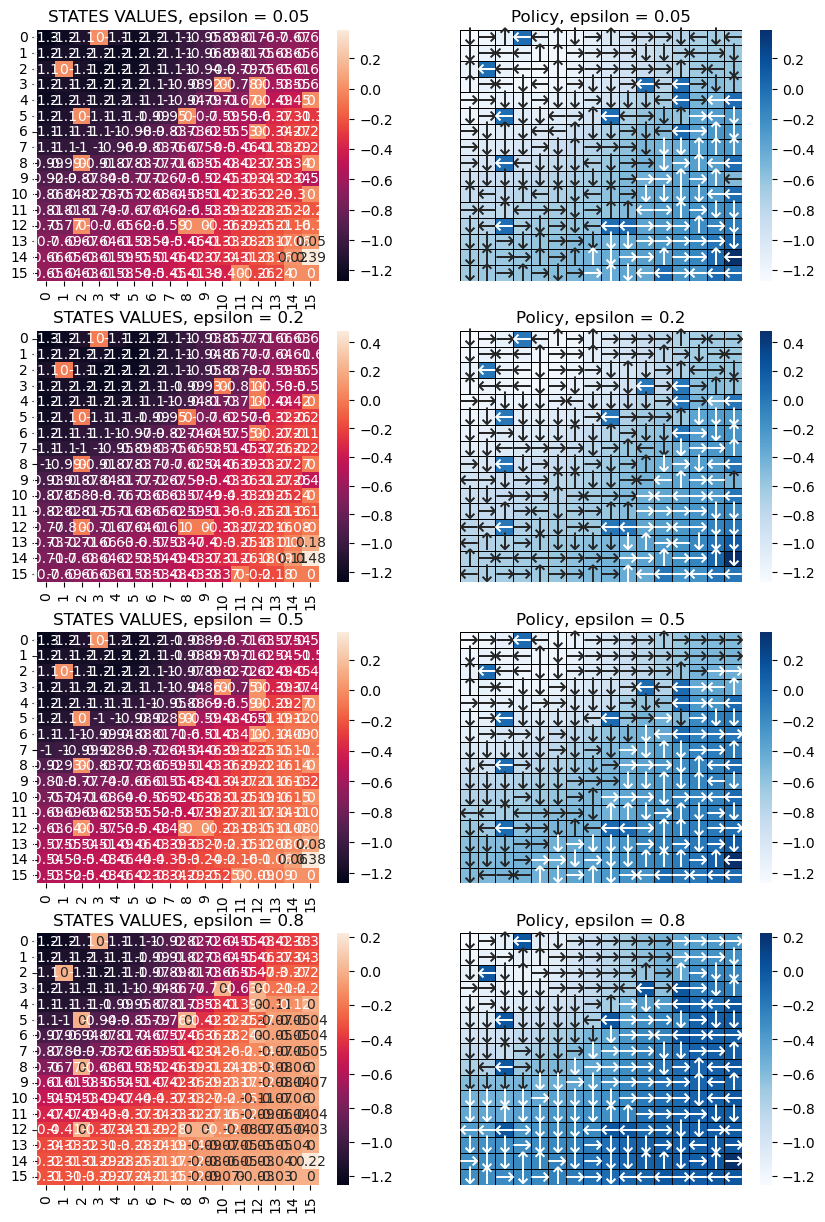

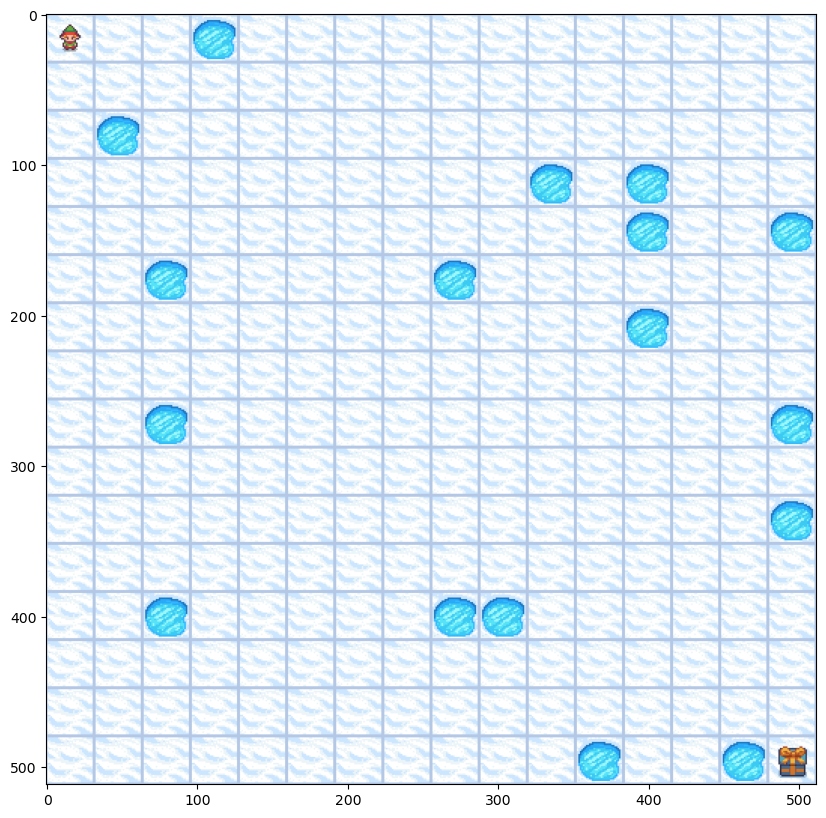

In [7]:
Q_q_big = {}
V_q_big = {}
pi_q_big = {}
Q_track_q_big = {}
pi_track_q_big = {}
epsilon_list = [0.05,0.2,0.5,0.8]

fig, ax = plt.subplots(len(epsilon_list),2,figsize=(10, 15))
for _,epsilon in enumerate(epsilon_list):
    
    Q_q_big[epsilon], V_q_big[epsilon], pi_q_big[epsilon], Q_track_q_big[epsilon], pi_track_q_big[epsilon] = RL(frozen_lake.env).q_learning(min_epsilon=epsilon,gamma=1,n_episodes=100000)



    data = np.around(np.array(V_q_big[epsilon]).reshape((NROW, NCOL)), 2)
    df = pd.DataFrame(data=data)

    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

    direction_df = pd.DataFrame(data=np.array([directions[pi_q_big[epsilon](i)] for i in range(NROW*NCOL)]).reshape((NROW, NCOL)))

    
            

    
    sns.heatmap(df, annot=True,ax = ax[_,0]).set_title("STATES VALUES, epsilon = "+str(epsilon))
    #ax[1] = sns.heatmap(df, annot=direction_df).set_title("OPTIMAL POLICY")

    sns.heatmap(
            df,
            annot=direction_df,
            fmt="",
            ax=ax[_,1],
            cmap=sns.color_palette("Blues", as_cmap=True),
            linewidths=0.7,
            linecolor="black",
            xticklabels=[],
            yticklabels=[],
            annot_kws={"fontsize": "xx-large"},
        ).set(title="Policy, epsilon = "+str(epsilon))
    frozen_lake.reset()

fig2, ax2 = plt.subplots(1,1,figsize=(15, 10))
ax2.imshow(frozen_lake.render())

plt.show()

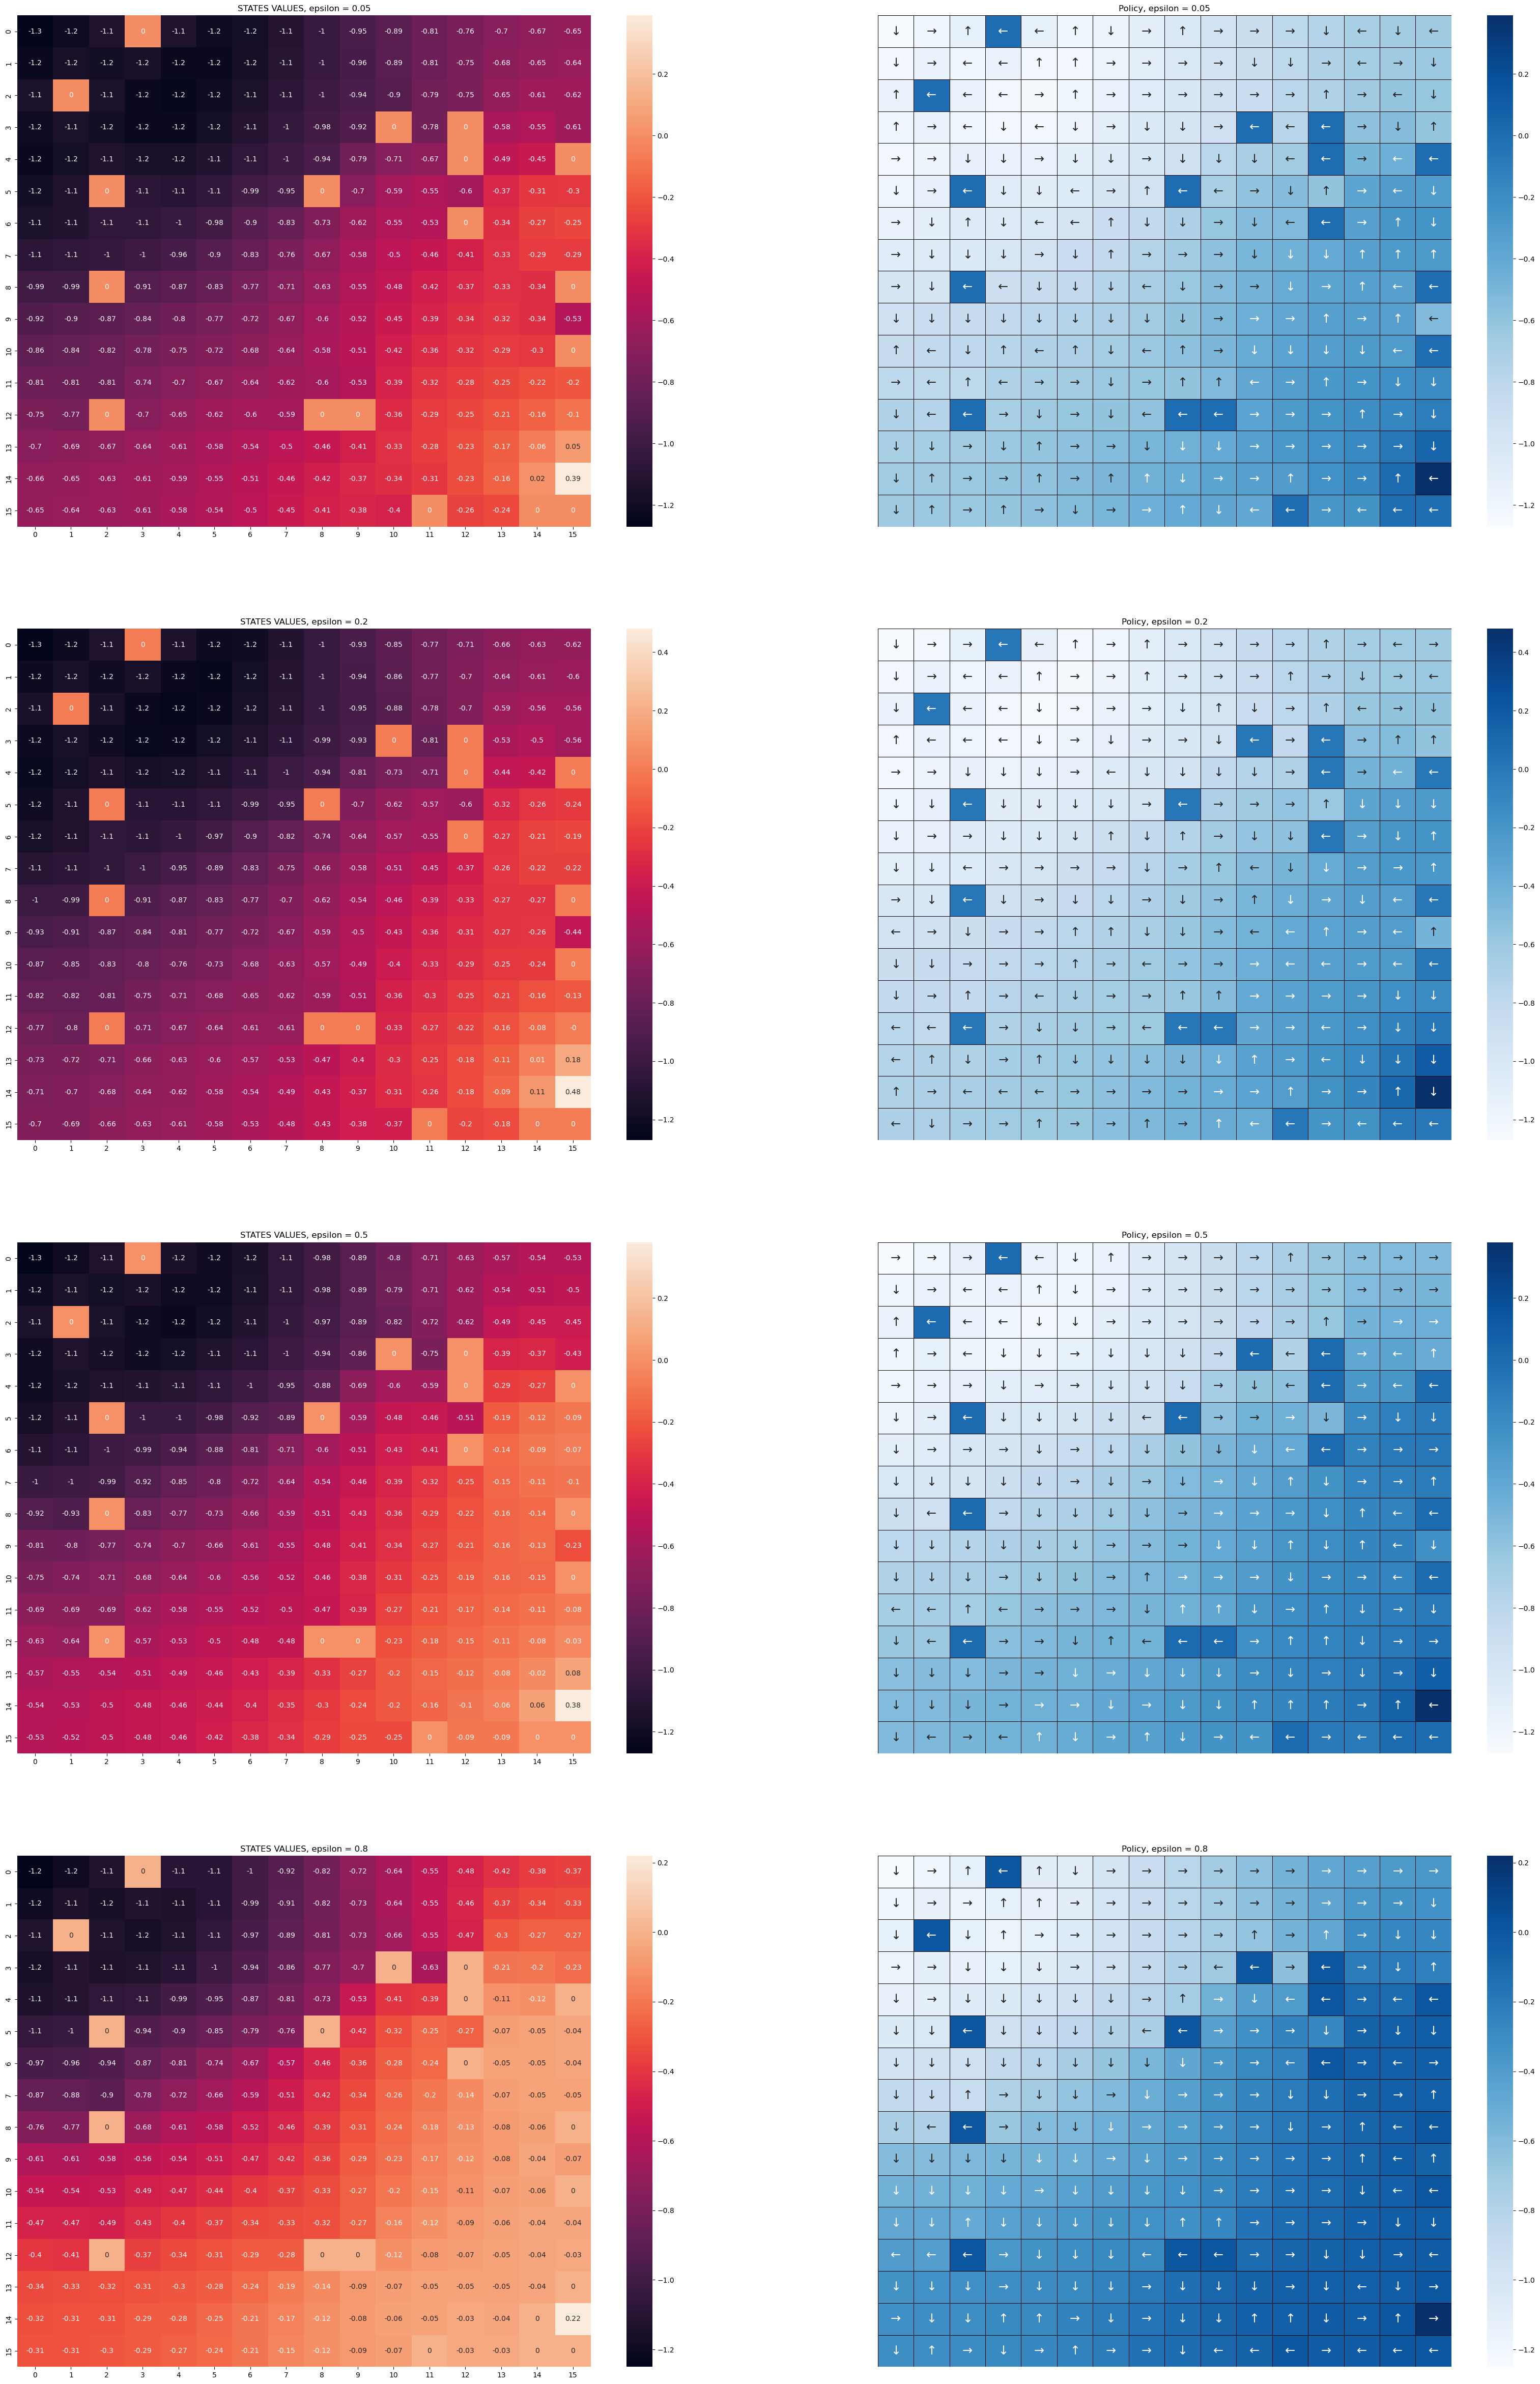

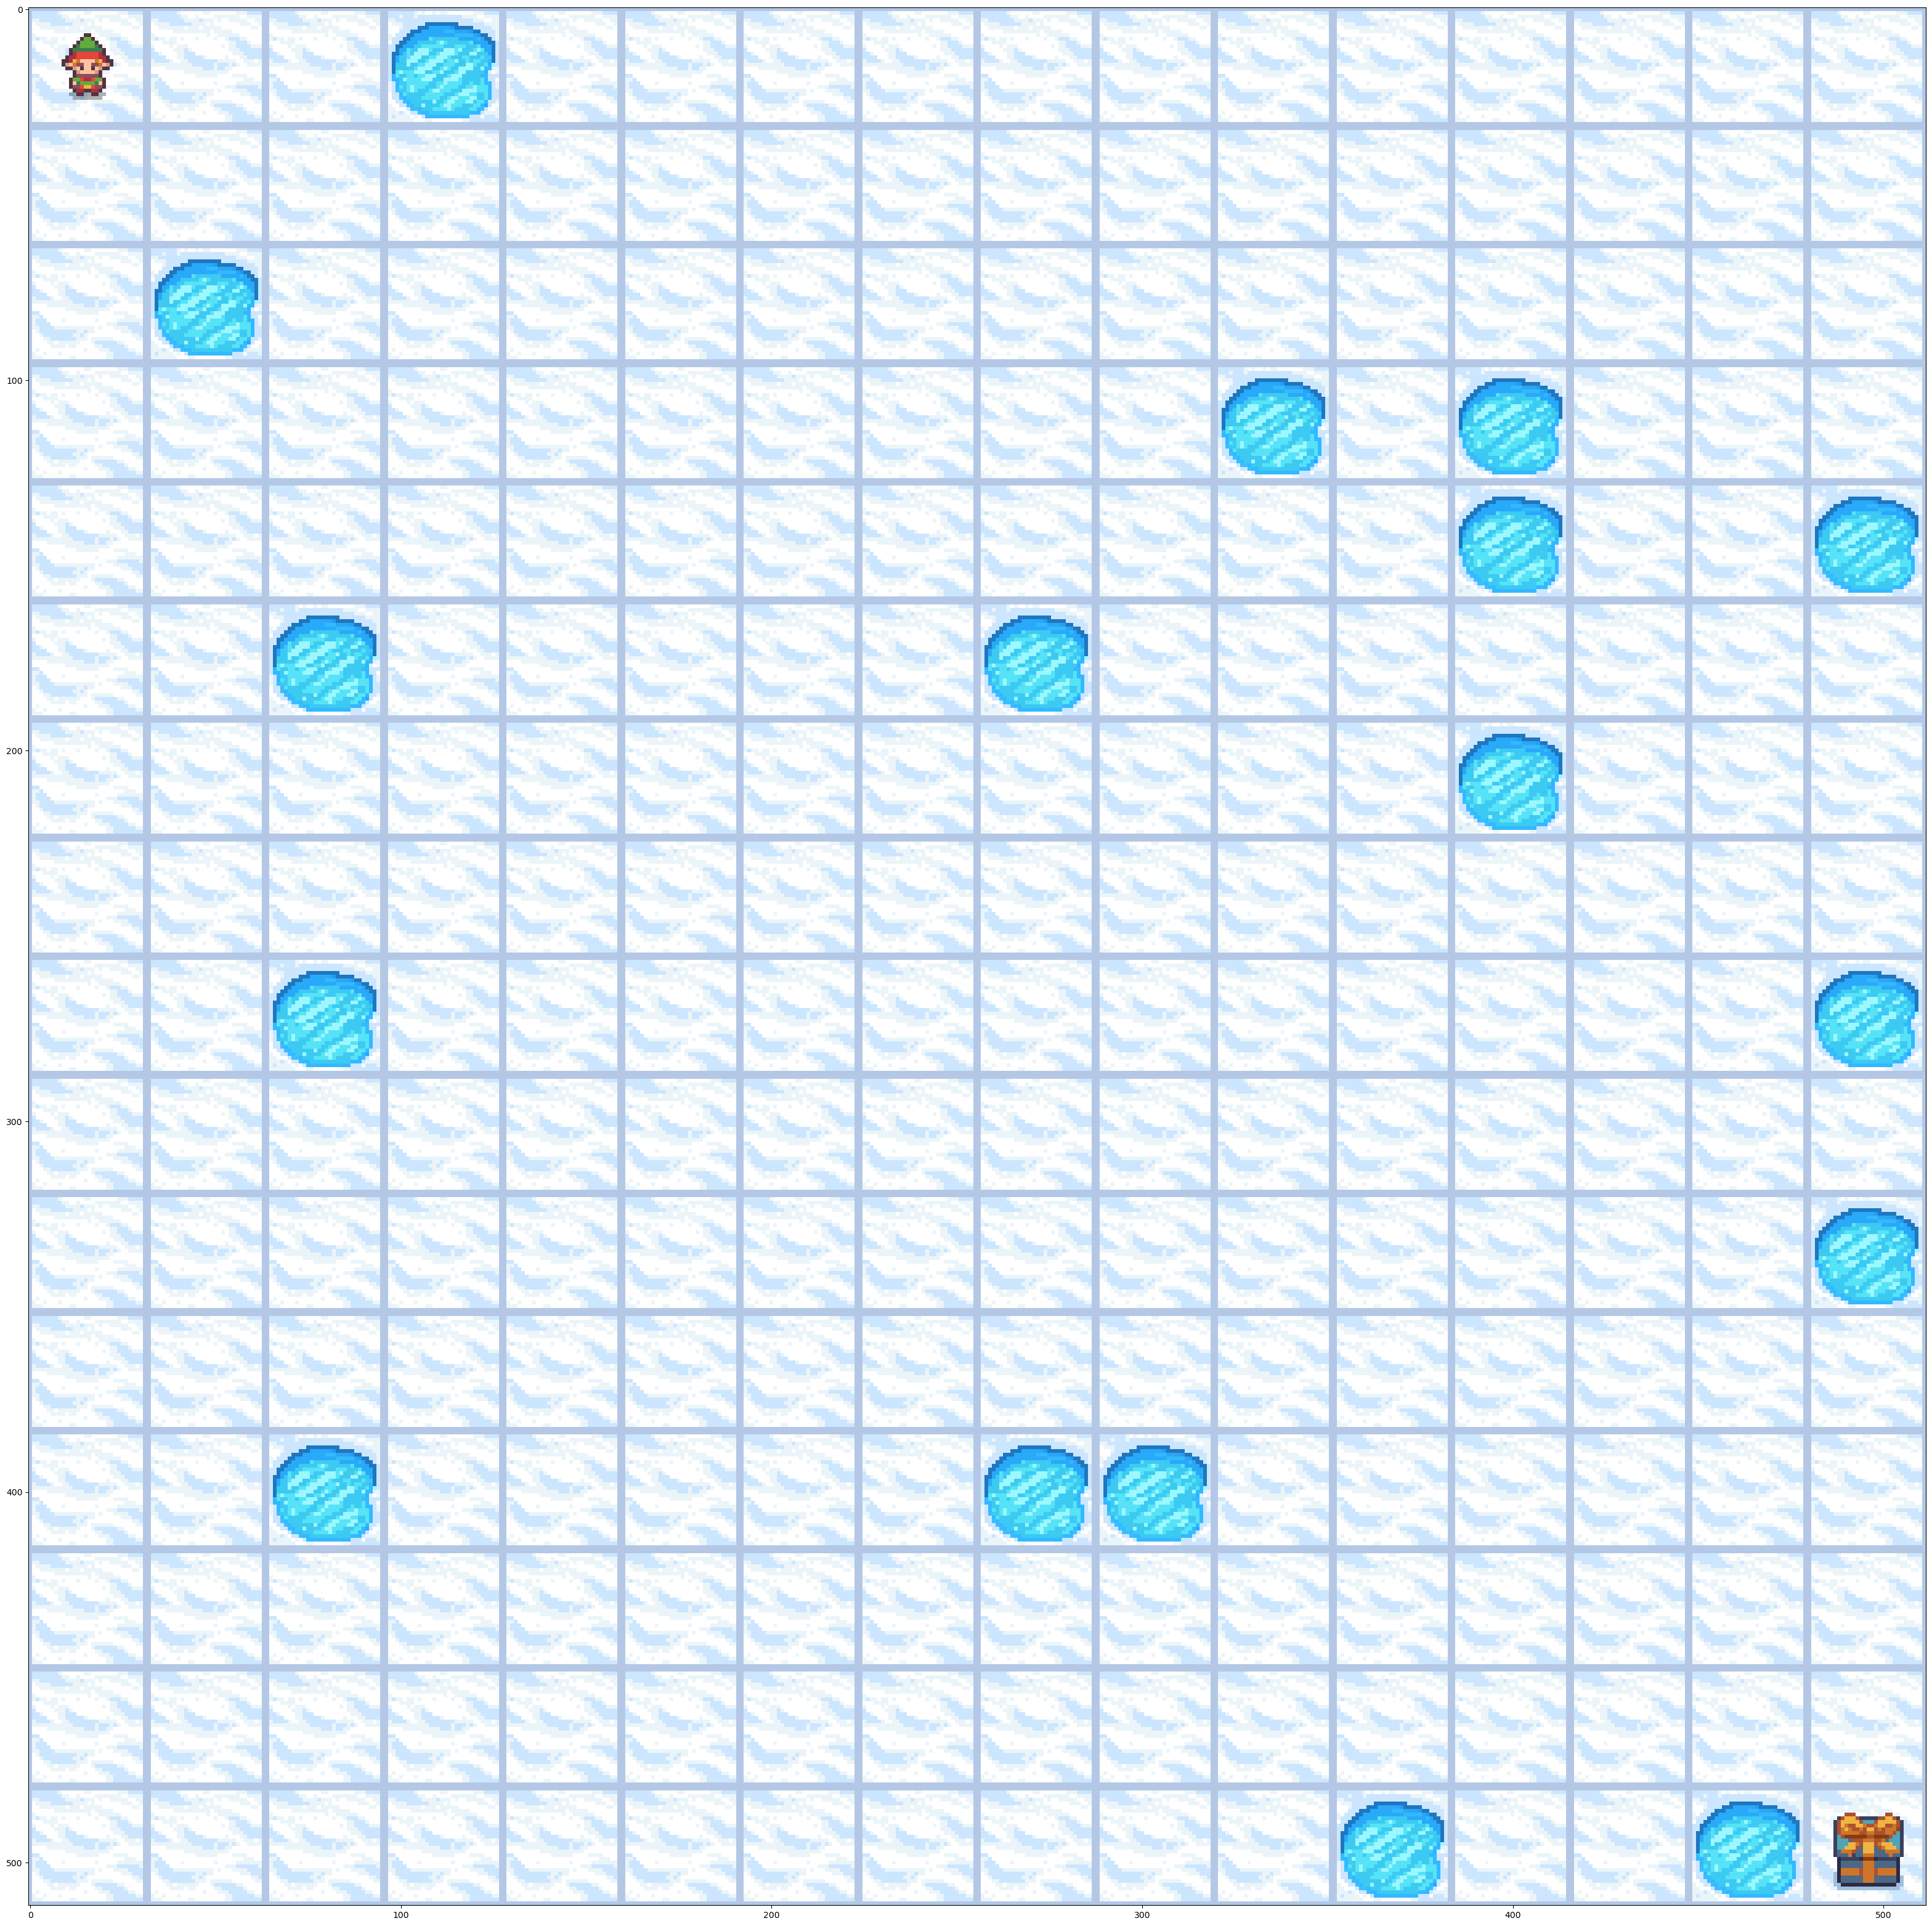

In [9]:
fig, ax = plt.subplots(len(epsilon_list),2,figsize=(10 * 4, 15 * 4))
for _,epsilon in enumerate(epsilon_list):
    
    #Q_q_big[epsilon], V_q_big[epsilon], pi_q_big[epsilon], Q_track_q_big[epsilon], pi_track_q_big[epsilon] = RL(frozen_lake.env).q_learning(min_epsilon=epsilon,gamma=1,n_episodes=100000)



    data = np.around(np.array(V_q_big[epsilon]).reshape((NROW, NCOL)), 2)
    df = pd.DataFrame(data=data)

    directions = {0: "←", 1: "↓", 2: "→", 3: "↑"}

    direction_df = pd.DataFrame(data=np.array([directions[pi_q_big[epsilon](i)] for i in range(NROW*NCOL)]).reshape((NROW, NCOL)))

    
            

    
    sns.heatmap(df, annot=True,ax = ax[_,0]).set_title("STATES VALUES, epsilon = "+str(epsilon))
    #ax[1] = sns.heatmap(df, annot=direction_df).set_title("OPTIMAL POLICY")

    sns.heatmap(
            df,
            annot=direction_df,
            fmt="",
            ax=ax[_,1],
            cmap=sns.color_palette("Blues", as_cmap=True),
            linewidths=0.7,
            linecolor="black",
            xticklabels=[],
            yticklabels=[],
            annot_kws={"fontsize": "xx-large"},
        ).set(title="Policy, epsilon = "+str(epsilon))
    frozen_lake.reset()

fig2, ax2 = plt.subplots(1,1,figsize=(15 * 4, 10 * 4))
ax2.imshow(frozen_lake.render())

plt.show()

In [10]:
#Q_q_big[epsilon], V_q_big[epsilon], pi_q_big[epsilon], Q_track_q_big[epsilon], pi_track_q_big[epsilon]
V_big = {}
for epsilon in [0.8,0.5,0.2,0.05]:
    V_big[epsilon] = []
    for i in range(len(Q_track_q_big[epsilon])):
        V = np.max(Q_track_q_big[epsilon][i],axis=1)
        V_big[epsilon].append(np.mean(V))
    

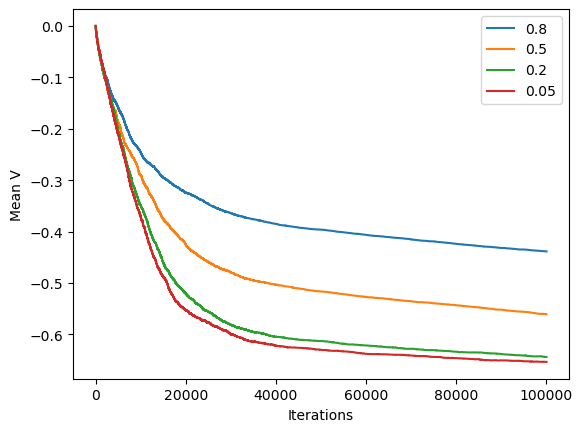

In [11]:
plt.plot(V_big[0.8],label = '0.8')
plt.plot(V_big[0.5],label = '0.5')
plt.plot(V_big[0.2],label = '0.2')
plt.plot(V_big[0.05],label = '0.05')
plt.xlabel('Iterations')
plt.ylabel('Mean V')
plt.legend()